In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv('/content/framingham.csv')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['BMI']=le.fit_transform(data['BMI'])
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,748,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,898,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,596,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,884,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,388,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,296,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,83,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,252,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,618,67.0,72.0,0


In [3]:
data.isnull().sum()
data.dropna(inplace=True)
print(data)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  \
0                   0             0         0    195.0  106.0   70.0  748   
1                   0             0         0    250.0  121.0   8

In [4]:
x=data.iloc[:,[0,1,2,3]].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [5]:
print(knn.score(x_test,y_test))

0.8299319727891157


In [6]:
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[603  30]
 [ 95   7]]


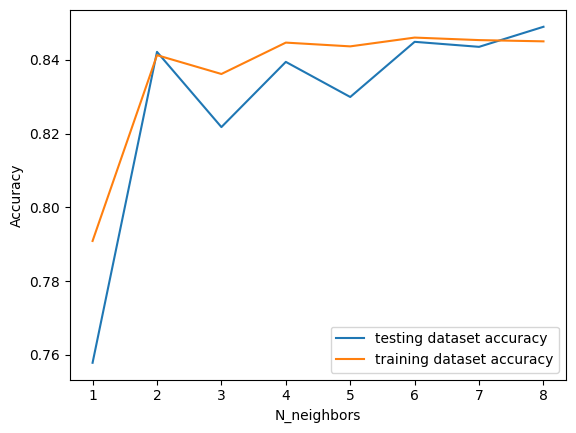

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x=data.iloc[:,[0,1,2,3]].values
y=data.iloc[:,-1].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  train_accuracy[i]=knn.score(x_train,y_train)
  test_accuracy[i]=knn.score(x_test,y_test)
plt.plot(neighbors,test_accuracy,label='testing dataset accuracy')
plt.plot(neighbors,train_accuracy,label='training dataset accuracy')
plt.legend()
plt.xlabel('N_neighbors')
plt.ylabel('Accuracy')
plt.show()